In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import seaborn as sns

1. Загрузите прилагающийся датасет.

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [ ]:
print(df.isna().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

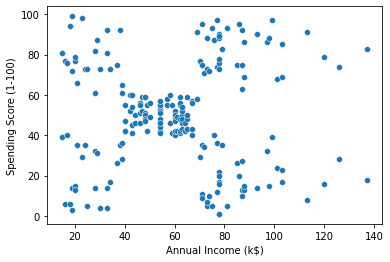

In [ ]:
sns.scatterplot(y='Spending Score (1-100)', x='Annual Income (k$)', data=df);

4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

In [ ]:
x = df.iloc[:, [3, 4]].values

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Сумма квадратов внутри кластера')

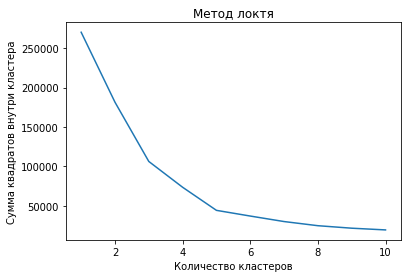

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов внутри кластера')

5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [ ]:
kmeans_method = KMeans(n_clusters = 5, init='k-means++', random_state=42)
y_kmeans = kmeans_method.fit_predict(x)

6.Построить графическую интерпретацию из пункта 3, с центрами кластеров.

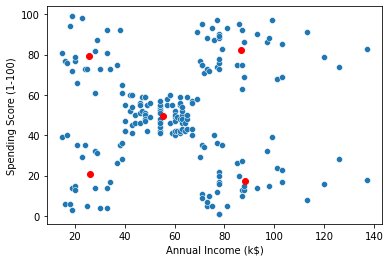

In [ ]:
sns.scatterplot(y='Spending Score (1-100)', x='Annual Income (k$)', data=df)
plt.scatter(kmeans_method.cluster_centers_[:,0],kmeans_method.cluster_centers_[:,1],c='red');

7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

In [ ]:
X1 = df.iloc[:, [2, 4]].values
X1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [ ]:
wcss1 = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans1.fit(X1)
    wcss1.append(kmeans1.inertia_)

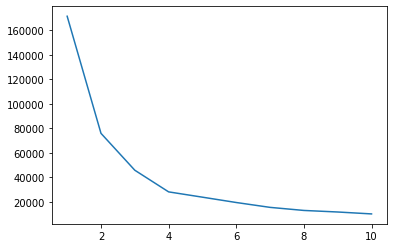

In [ ]:
plt.plot(range(1,11),wcss1)
plt.show()

In [ ]:
kmeans_method2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
y_kmeans2 = kmeans_method2.fit_predict(X1)
print(y_kmeans2)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


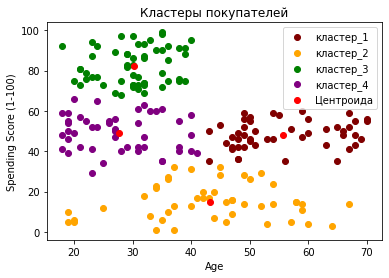

In [ ]:
plt.scatter(X1[y_kmeans2 == 0, 0], X1[y_kmeans2 == 0, 1], c='maroon', label='кластер_1')
plt.scatter(X1[y_kmeans2 == 1, 0], X1[y_kmeans2 == 1, 1], c='orange', label='кластер_2')
plt.scatter(X1[y_kmeans2 == 2, 0], X1[y_kmeans2 == 2, 1], c='green', label='кластер_3')
plt.scatter(X1[y_kmeans2 == 3, 0], X1[y_kmeans2 == 3, 1], c='purple', label='кластер_4')
plt.scatter(kmeans_method2.cluster_centers_[:,0],kmeans_method2.cluster_centers_[:,1],c='red', label='Центроида');
plt.title('Кластеры покупателей')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend();

8. Оцените модель с помощью метрик.

In [ ]:
print(f'Расстояние разделения между кластерами: {silhouette_score(X1, y_kmeans2)}')
print(f'Соотношение дисперсий: {calinski_harabasz_score(x, y_kmeans)}')

Расстояние разделения между кластерами: 0.49973941540141753
Соотношение дисперсий: 247.35899338037282


9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [ ]:
iter_list = list(range(2,25))
silhouette_list = []
calinski_harabasz_list = []


for n_clusters in iter_list:
    
    kmeans2 = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    predicted = kmeans2.fit_predict(X1)
    centers = kmeans2.cluster_centers_
    
    score1 = silhouette_score(X1, predicted)
    score2 = calinski_harabasz_score(X1, predicted)
    
    silhouette_list.append(score1)
    calinski_harabasz_list.append(score2)
    print(f"Кол-во: {n_clusters}, silhouette = {round(score1,5)}, calinski_harabasz = {round(score2,5)})")


Кол-во: 2, silhouette = 0.46923, calinski_harabasz = 249.19429)
Кол-во: 3, silhouette = 0.453, calinski_harabasz = 270.08633)
Кол-во: 4, silhouette = 0.49974, calinski_harabasz = 332.56313)
Кол-во: 5, silhouette = 0.44527, calinski_harabasz = 302.43944)
Кол-во: 6, silhouette = 0.44055, calinski_harabasz = 302.46952)
Кол-во: 7, silhouette = 0.40833, calinski_harabasz = 321.55914)
Кол-во: 8, silhouette = 0.42903, calinski_harabasz = 332.19775)
Кол-во: 9, silhouette = 0.41199, calinski_harabasz = 329.64461)
Кол-во: 10, silhouette = 0.40531, calinski_harabasz = 331.06297)
Кол-во: 11, silhouette = 0.39096, calinski_harabasz = 318.32893)
Кол-во: 12, silhouette = 0.3794, calinski_harabasz = 317.62803)
Кол-во: 13, silhouette = 0.40573, calinski_harabasz = 319.52722)
Кол-во: 14, silhouette = 0.3975, calinski_harabasz = 322.98135)
Кол-во: 15, silhouette = 0.42495, calinski_harabasz = 330.3641)
Кол-во: 16, silhouette = 0.41172, calinski_harabasz = 334.48142)
Кол-во: 17, silhouette = 0.39578, cali

In [ ]:
silhouette_list = np.array(silhouette_list)
calinski_harabasz_list = np.array(calinski_harabasz_list)

silhouette_list = (silhouette_list - silhouette_list.min()) / (silhouette_list.max() - silhouette_list.min())
calinski_harabasz_list = (calinski_harabasz_list - calinski_harabasz_list.min()) / (calinski_harabasz_list.max() - calinski_harabasz_list.min())


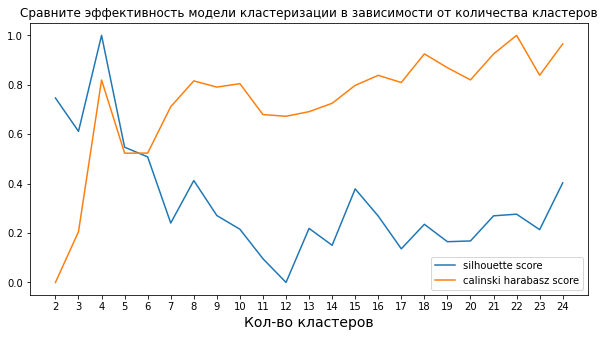

In [ ]:
x = iter_list
y = silhouette_list
z = calinski_harabasz_list

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='silhouette score')
plt.plot(x, z, label='calinski harabasz score')

plt.title('Сравните эффективность модели кластеризации в зависимости от количества кластеров')

plt.xlabel('Кол-во кластеров', fontsize=14)

plt.xticks(x)
plt.legend();